**NOMBRE:** Andrés Felipe Ocampo Quiceno

## 1. Contexto del análisis

La deserción en la educación superior es un problema que ha cobrado gran relevancia en el  escenario nacional desde hace un poco más de una década. El estudiante y su familia, las instituciones educativas, el Sistema de educación superior y la sociedad en su conjunto asumen los costos y efectos negativos de la suspensión de los estudios de cada estudiante. Por tanto, para las Instituciones educativas es un deber entender este fenómeno y maximizar los esfuerzos para mitigarlo.

A razón de lo expuesto anteriormente, para la Universidad Icesi, disminuir los índices de deserción es una tarea imperativa que requiere ser puesta en marcha con todos los recursos requeridos. Esto se refleja en el Plan de Desarrollo Institucional al 2022, planteado en el 2012, y en el que la Universidad se planteó como Objetivo Estratégico Institucional: "*Aumentar el porcentaje de graduación de los estudiantes, con excelencia en valores y capacidades*". Uno de los indicadores que evalúa el cumplimiento de ese objetivo es justamente el indicador de deserción (medido a ciertos semestres).

Existen varios indicadores que miden la deserción, y su diversidad dependerá del momento en que se mida la deserción. Ejemplo, un indicador puede medir la deserción de una cohorte de estudiantes al pasar 11 semestres o, incluso, 14 semestres. Sin embargo, tanto en la literatura nacional, como para el caso de la Universidad Icesi, se observa que la deserción ocurre, mayoritariamente, en los primeros periodos académicos. De hecho, para la Universidad se encuentra que 2 de cada 3 estudiantes que desertan lo hacen luego de culminar  entre uno y tres periodos académicos (4 de cada 5 estudiantes entre uno y cuatro periodos). Por ello, el presente análisis se enfocará en la llamada deserción temprana, que es la que ocurre en los primeros 4 semestres.

In [13]:
# Cargue de librerías

import pandas as pd
from scipy.stats import skew, kurtosis
import numpy as np  ## Libreria para operaciones numéricas
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar

In [2]:
# Cargue de dataset completo

BASE_PRELIMINAR=pd.read_excel("Base_deserción_180822 (desde 201402).xlsx")
BASE=BASE_PRELIMINAR[["CODIGO","PUNTAJE_ICFES","GENERO","CIUDAD_COLEGIO","DEPTO_COLEGIO","FECHA_NACIMIENTO","ESTRATO","ETNIA"]]
BASE

,CODIGO,PUNTAJE_ICFES,GENERO,CIUDAD_COLEGIO,DEPTO_COLEGIO,FECHA_NACIMIENTO,ESTRATO,ETNIA
0,A00399991,374.0,F,NaN,NaN,27-JUN-1990,6.0,NaN
1,A00027832,339.0,M,CALI,VALLE DEL CAUCA,12-JUN-1995,4.0,BA - Blanco
2,A00027832,339.0,M,CALI,VALLE DEL CAUCA,12-JUN-1995,4.0,BA - Blanco
3,A00060092,393.0,M,PALMIRA,VALLE DEL CAUCA,29-ENE-1997,2.0,ME - Mestizo
4,A00060092,393.0,M,PALMIRA,VALLE DEL CAUCA,29-ENE-1997,2.0,ME - Mestizo
...,...,...,...,...,...,...,...,...
13001,A00079868,425.0,M,CALI,VALLE DEL CAUCA,22-AGO-1988,2.0,NaN
13002,A00130864,288.0,F,CALI,VALLE DEL CAUCA,16-ABR-1998,3.0,NaN
13003,A00340452,275.0,F,CALI,VALLE DEL CAUCA,07-ABR-1998,2.0,BA - Blanco
13004,A00351285,NaN,M,CALI,VALLE DEL CAUCA,25-ABR-1996,3.0,OT - Otro


## 2. Pregunta SMART

La pregunta de negocio que guiará nuestro análisis será la siguiente: **¿Cuáles son los factores que más influyen en el aumento de la deserción temprana de los estudiantes de pregrado de la Universidad Icesi?**

## 3. Descripción de los datos

### Código

**Tipo:** Cualitativa nominal.
**Contexto:** Corresponde al código asignado al estudiante por la plataforma Banner cuando este se matricula formalmente en la Universidad.
**Expectativa:** Es la identificación del estudiante y, además, la llave primaria que permitiría conectar, eventualmente, con otras bases de datos.

### Puntaje Global

**Tipo:** Cuantitativa continua.
**Contexto:** Corresponde al puntaje global del estudiante en las pruebas Saber 11.
**Expectativa:** Es la principal variable proxy del rendimiento académico que tendrá el estudiante en la Universidad.

### Genero

**Tipo:** Cualitativa nominal.
**Contexto:** Corresponde al género con el que se identificó el estudiante al ingresar a la Universidad.
**Expectativa:** Es una variable de caracterización importante cuyo análisis podría conducir a análisis diferenciados de resultados de deserción según sexo y lograr así focalizar estrategias en cada sexo según corresponda.

### Ciudad colegio

**Tipo:** Cualitativa nominal.
**Contexto:** Corresponde a la ciudad del colegio en el que el estudiante finalizó su educación media.
**Expectativa:** Es una variable proxy del rendimiento académico que tendrá el estudiante de la Universidad pues la ciudad podría delimitar la calidad del colegio en donde el estudiante recibió su educación media.

### Departamento colegio

**Tipo:** Cualitativa nominal.
**Contexto:** Corresponde al departamento del colegio en el que el estudiante finalizó su educación media.
**Expectativa:** Es una variable proxy del rendimiento académico que tendrá el estudiante de la Universidad pues el departamento podría delimitar la calidad del colegio en donde el estudiante recibió su educación media.

### Fecha nacimiento

**Tipo:** Cualitativa nominal.
**Contexto:** Corresponde a la fecha de nacimiento del estudiante.
**Expectativa:** Es una variable valiosa en términos de que su transformación permitiría el cálculo de otra variable importante que sería la edad actual del estudiante.

### Estrato

**Tipo:** Cualitativa ordinal.
**Contexto:** Corresponde al estrato registrado en el recibo de servicios públicos (energía) de la vivienda en donde reside el estudiante al momento de la inscripción a la Universidad.
**Expectativa:** Es, quizás, la principal variable proxy de las condiciones socioeconómicas del estudiante. 

### Etnia

**Tipo:** Cualitativa nominal.
**Contexto:** Corresponde a la etnia registrada por el estudiante al momento de la inscripción a la Universidad.
**Expectativa:** Es una variable proxy de las condiciones socioeconómicas y relacionamiento del estudiante.

## 4. Análisis general del dataset

### Forma y tamaño del dataset

In [3]:
BASE.shape

(13006, 8)

La base tiene **13.006 filas y 8 columnas**.

### Revisión de los tipos de variables

In [4]:
BASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13006 entries, 0 to 13005
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CODIGO            13006 non-null  object 
 1   PUNTAJE_ICFES     12224 non-null  float64
 2   GENERO            12998 non-null  object 
 3   CIUDAD_COLEGIO    12981 non-null  object 
 4   DEPTO_COLEGIO     12979 non-null  object 
 5   FECHA_NACIMIENTO  13004 non-null  object 
 6   ESTRATO           12998 non-null  float64
 7   ETNIA             11624 non-null  object 
dtypes: float64(2), object(6)
memory usage: 813.0+ KB


Como se puede apreciar en la tabla anterior, el dataset contiene, según Python, dos variables tipo float (números con decimales) y 6 tipo object (texto). Al analizar los tipos de algunas variables es posible darse cuenta que la única variable que no está siendo leída de forma correcta es la correspondiente con estrato, puesto que Python la está tomando como una variable tipo float, sin embargo, es realmente una variable cualitativa ordinal (tiene un órden específico según categorías de estrato). Se procede a realizar el cambio y, posteriormente, a verificar el cambio de la variable a tipo categórica.

In [5]:
BASE["ESTRATO"].value_counts()

2.0    3300
3.0    2360
5.0    2331
1.0    1827
4.0    1779
6.0    1315
0.0      86
Name: ESTRATO, dtype: int64

In [6]:
BASE["ESTRATO"] = pd.Categorical(BASE["ESTRATO"], categories=[0,1,2,3,4,5,6], ordered=True)

D:\Usuarios\1143835519\AppData\Local\Temp\ipykernel_13352\3343026015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BASE["ESTRATO"] = pd.Categorical(BASE["ESTRATO"], categories=[0,1,2,3,4,5,6], ordered=True)


In [7]:
BASE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13006 entries, 0 to 13005
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CODIGO            13006 non-null  object  
 1   PUNTAJE_ICFES     12224 non-null  float64 
 2   GENERO            12998 non-null  object  
 3   CIUDAD_COLEGIO    12981 non-null  object  
 4   DEPTO_COLEGIO     12979 non-null  object  
 5   FECHA_NACIMIENTO  13004 non-null  object  
 6   ESTRATO           12998 non-null  category
 7   ETNIA             11624 non-null  object  
dtypes: category(1), float64(1), object(6)
memory usage: 724.4+ KB


## 5. Análisis Univariado

 ### Identificar Valores Nulos

In [8]:
#identificar la cantidad de valores nulos

BASE.isna().sum()

CODIGO                 0
PUNTAJE_ICFES        782
GENERO                 8
CIUDAD_COLEGIO        25
DEPTO_COLEGIO         27
FECHA_NACIMIENTO       2
ESTRATO                8
ETNIA               1382
dtype: int64

In [9]:
null_percentage = BASE.isnull().mean()*100
null_percentage

CODIGO               0.000000
PUNTAJE_ICFES        6.012610
GENERO               0.061510
CIUDAD_COLEGIO       0.192219
DEPTO_COLEGIO        0.207596
FECHA_NACIMIENTO     0.015378
ESTRATO              0.061510
ETNIA               10.625865
dtype: float64

Se identifica que las únicas variables que presentan valores nulos son las variables: **PUNTAJE_ICFES y ETNIA**. En el caso de la variable PUNTAJE_ICFES el porcentaje de valores nulos es el 6%, mientras que en el caso de la variable ETNIA este porcentaje es aproximadamente 11%.

### Analizar la distribución de las variables continuas

Para el caso de nuestro dataset tenemos únicamente una variable continua que corresponde con la variable de PUNTAJE_ICFES. Se procede a analizar esta variable.

In [10]:
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas
fun_tabla_descriptivas(BASE['PUNTAJE_ICFES'])

,PUNTAJE_ICFES
count,12224.000000
mean,345.230121
std,49.684955
min,0.000000
25%,318.000000
50%,346.000000
75%,371.000000
max,900.000000
coef. variation,0.143918
skew,NaN


En esta primera aproximación a la variable, es importante indicar que la media (345) es casi igual a la mediana (346), lo que anticipa la presencia de una **distribución simétrica**. El menor puntaje registrado es 0 mientras que el máximo es 900 (ambos datos son incorrectos, por lo que tendrían que ser validados y limpiados posteriormente). Con los datos actuales se puede decir que **el 50% de los estudiantes matriculados en Icesi tiene puntajes entre 318 y 371**, por lo que también se puede anticipar una concentración importante de los datos (la escala correcta de esta variable es 0 a 500). Por otro lado, las medidas de asimetría y curtosis no se encuentran calculado, básicamente, por la presencia de 782 valores nulos en la muestra (estos valores nulos se validarán y corregirán posteriormente en la fase de limpieza). 

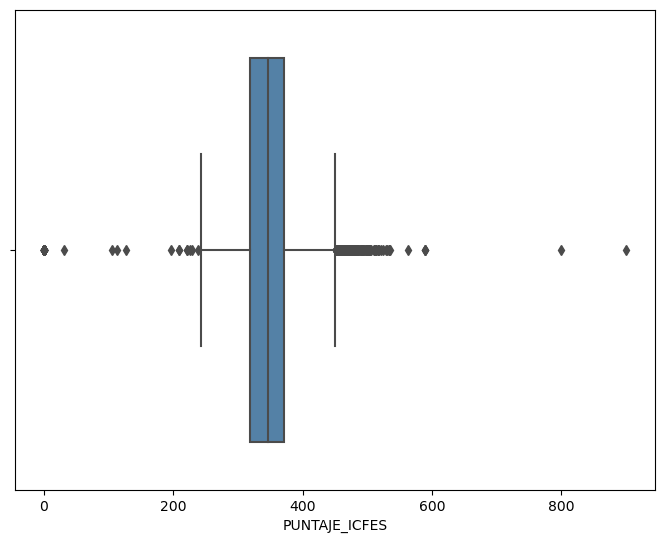

In [16]:
fig_box2 = plt.figure() 
ax = fig_box2.add_axes([0,0,1,1])
ax=sns.boxplot(x=BASE['PUNTAJE_ICFES'],color="steelblue")
#ax = sns.swarmplot(x=BASE['PUNTAJE_ICFES'],color='black')
plt.show()

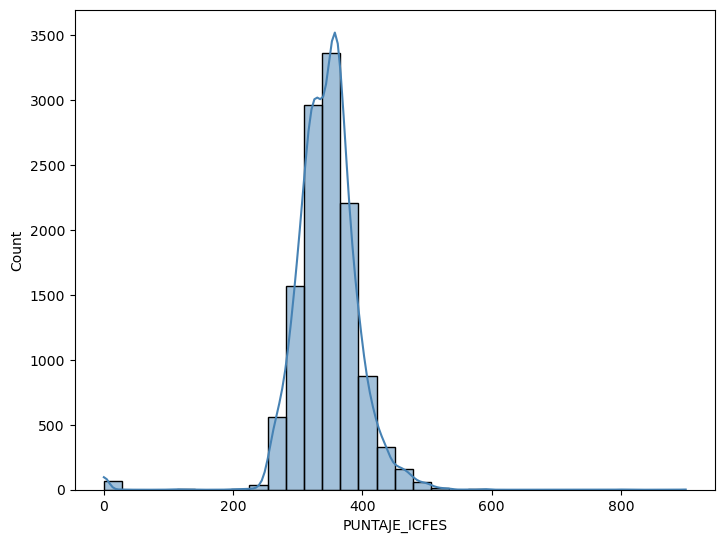

In [17]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=BASE['PUNTAJE_ICFES'],kde=True,color="steelblue", 
                bins=round(1+3.322*np.log(len(BASE['PUNTAJE_ICFES']))))
plt.show() 

Como se puede apreciar tanto en el histograma como en el diagrama de cajas, la distribución de la variable de PUNTAJE_ICFES tiene una distribución asimétrica y, además, es una en la que los datos se encuentran concentrados, algo que ya se veía en las estadísticas descriptivas generadas con anterioridad. La alta concentración de los datos tiene que ver con que la Universidad tiene un tope mínimo de admisión para estudiantes que corresponde con 250. En ese sentido los datos que están por debajo de ese tope son datos que, muy probablemente, son incorrectos y deberán ser eliminados en un fase posterior de limpieza. Esto mismo sucede para aquellos datos que superan 500 (puntaje máximo).

###  Evaluar la necesidad de usar Label encoding y/o  hot-encoding

En el caso puntual de este dataset hay tres variables para las cuales es posible y requerido aplicar alguna de las dos técnicas, Label Encoding o Hot Encoding. En el caso de las variables GENERO y ETNIA, variables cualitativas nominales, se debería aplicar One Hot Encoding. Mientras que, en el caso de la variable ESTRATO, variable cualitativa ordinal, se debería aplicar Label Encoding.